# Resulting loss


In [28]:
from arx.sarx import *
from arx.cv import *
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
hdata = pd.read_csv('../results/1-hard-loss.csv')
edata = pd.read_csv('../results/1-easy-loss.csv')
hdata.scheme.unique()

array(['LOO', 'h-block (h=3)', 'hv-block (h=3, v=3)', '5-fold', '10-fold',
       'LFO (h=0, v=0, w=10)', 'LFO (h=3, v=3, w=10)'], dtype=object)

In [30]:
schemes_by_type = {
    'pointwise': ['LOO', 'h-block (h=3)', 'LFO (h=0, v=0, w=10)'],
    'joint': ['hv-block (h=3, v=3)', '10-fold', 'LFO (h=3, v=3, w=10)']
}

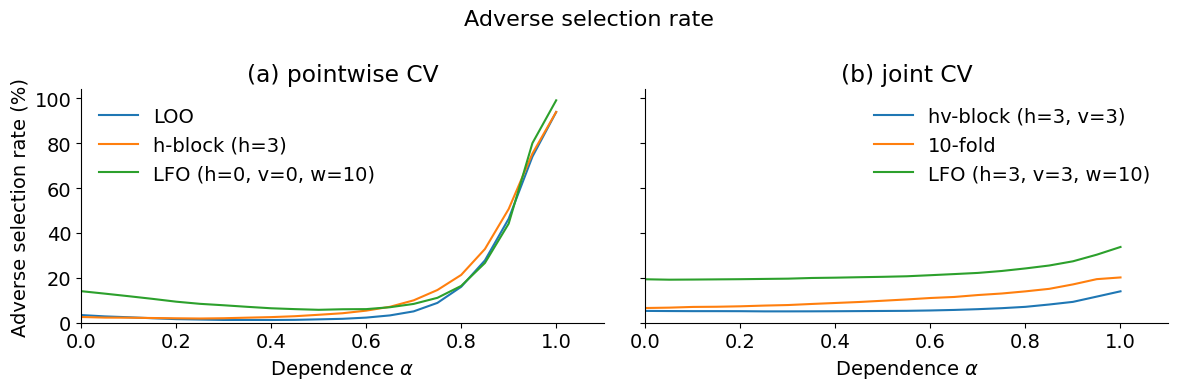

In [31]:
afig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)

plt.rcParams.update({'font.size': 14})
for i, (scheme_type, ax) in enumerate(zip(schemes_by_type.keys(), axes)):
    schemes = schemes_by_type[scheme_type]
    for scheme in schemes:
        ax.plot(hdata[hdata.scheme == scheme].alpha, 100.0 * hdata[hdata.scheme == scheme].zeroone)
    ax.legend(schemes, frameon=False)
    ax.set_title(f"({chr(ord('a')+i)}) {scheme_type} CV")
    ax.set_xlabel(r"Dependence $\alpha$")
    ax.set_xlim(0, 1.1)
    ax.set_ylim(ymin=0)
    ax.spines[['right', 'top']].set_visible(False)
axes[0].set_ylabel("Adverse selection rate (%)")
afig.suptitle("Adverse selection rate", fontsize=16)
afig.tight_layout()
afig.subplots_adjust(wspace=0.08, hspace=0)
afig.savefig('../../paper/figures/costs-adverse.pdf', bbox_inches='tight')

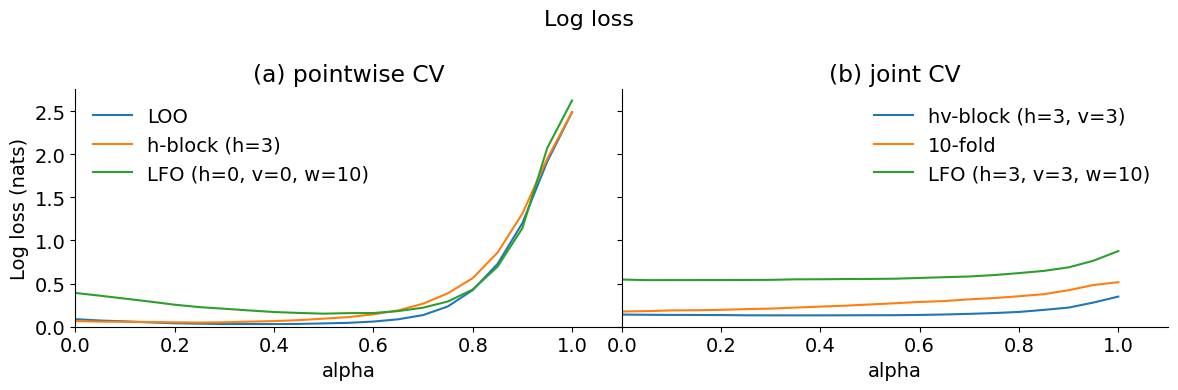

In [32]:
lfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
plt.rcParams.update({'font.size': 14})
for i, (scheme_type, ax) in enumerate(zip(schemes_by_type.keys(), axes)):
    schemes = schemes_by_type[scheme_type]
    for scheme in schemes:
        ax.plot(hdata[hdata.scheme == scheme].alpha, hdata[hdata.scheme == scheme].logloss)
    ax.legend(schemes, frameon=False)
    ax.set_title(f"({chr(ord('a')+i)}) {scheme_type} CV")
    ax.set_xlabel("alpha")
    ax.set_xlim(0, 1.1)
    ax.set_ylim(ymin=0)
    ax.spines[['right', 'top']].set_visible(False)
axes[0].set_ylabel("Log loss (nats)")
lfig.suptitle("Log loss", fontsize=16)
lfig.tight_layout()
lfig.subplots_adjust(wspace=0, hspace=0)
lfig.savefig('../../paper/figures/costs-logloss.pdf', bbox_inches='tight')

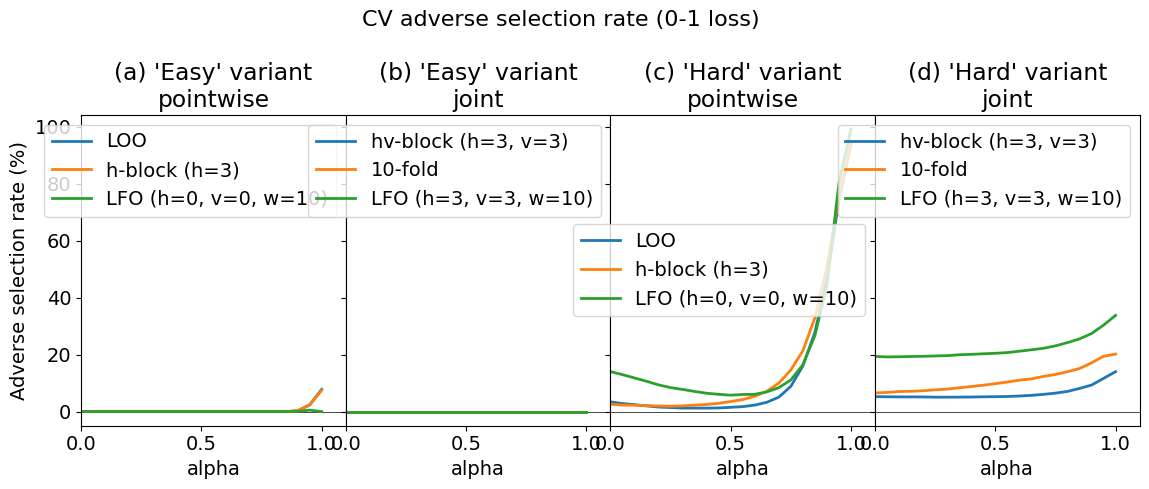

In [33]:
afig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5), sharey=True)

i = 0
for experiment, data, ax_subs in [('easy', edata, axes[:2]), ('hard', hdata, axes[2:])]:
    for scheme_type, ax in zip(schemes_by_type.keys(), ax_subs):
        schemes = schemes_by_type[scheme_type]
        for scheme in schemes:
            sel = data.scheme == scheme
            ax.plot(data[sel].alpha, 100.0 * data[sel].zeroone, linewidth=2)
        ax.legend(schemes)
        ax.set_title(f"({chr(ord('a')+i)}) '{experiment.title()}' variant\n{scheme_type}")
        i += 1
        ax.set_xlabel("alpha")
        ax.set_xlim(0, 1.1)
        #ax.set_ylim(ymin=0)
        ax.axhline(0, color='k', linestyle='-', zorder=-100, linewidth=0.5)
axes[0].set_ylabel("Adverse selection rate (%)")
afig.suptitle("CV adverse selection rate (0-1 loss)", fontsize=16)
afig.tight_layout()
afig.subplots_adjust(wspace=0, hspace=0)
#afig.savefig('../../paper/figures/costs-adverse.pdf', bbox_inches='tight')

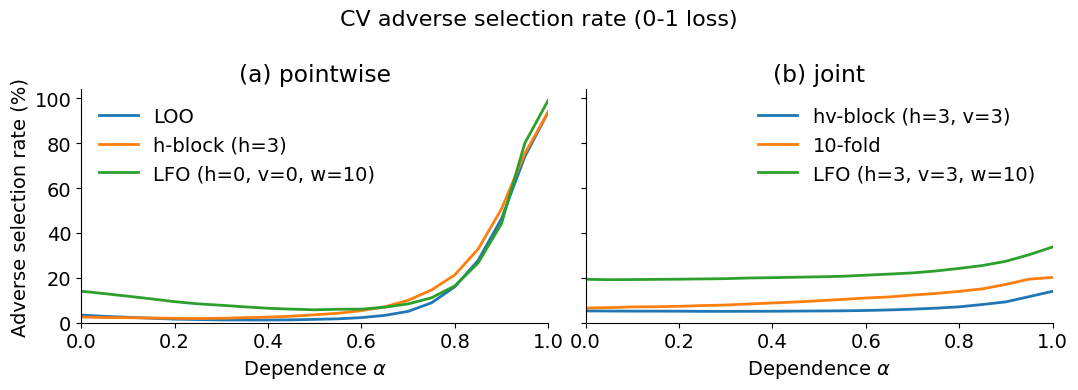

In [34]:
afig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharey=True)

plt.rcParams.update({'font.size': 14})

i = 0
for scheme_type, ax in zip(schemes_by_type.keys(), axes[:2]):
    schemes = schemes_by_type[scheme_type]
    for scheme in schemes:
        sel = hdata.scheme == scheme
        ax.plot(hdata[sel].alpha, 100.0 * hdata[sel].zeroone, linewidth=2)
    ax.legend(schemes, frameon=False)
    ax.set_title(f"({chr(ord('a')+i)}) {scheme_type}")
    i += 1
    ax.set_xlabel(r"Dependence $\alpha$")
    ax.set_xlim(0, 1.)
    ax.set_ylim(bottom=0)
    ax.spines[['top','right']].set_visible(False)
    ax.axhline(0, color='k', linestyle='-', zorder=-100, linewidth=0.5)
axes[0].set_ylabel("Adverse selection rate (%)")
afig.suptitle("CV adverse selection rate (0-1 loss)", fontsize=16)
afig.tight_layout()
afig.subplots_adjust(wspace=0.08, hspace=0)
afig.savefig('../../paper/figures/costs-adverse.pdf', bbox_inches='tight')

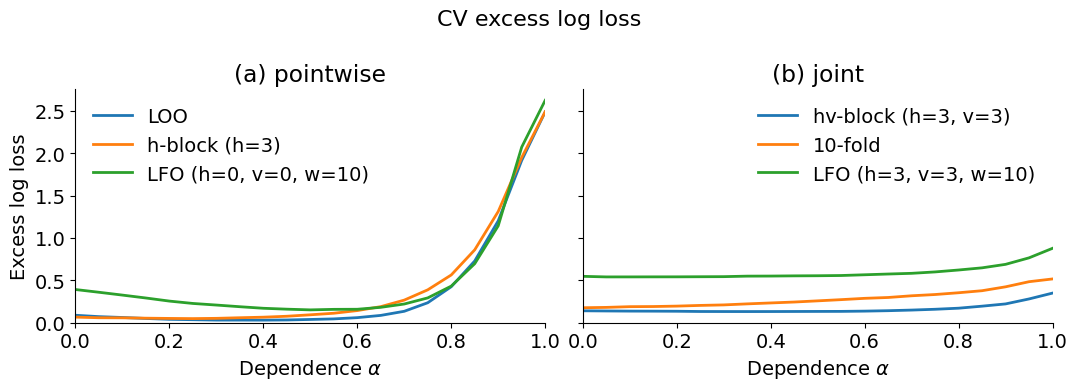

In [35]:
afig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharey=True)

plt.rcParams.update({'font.size': 14})
i = 0
for scheme_type, ax in zip(schemes_by_type.keys(), axes[:2]):
    schemes = schemes_by_type[scheme_type]
    for scheme in schemes:
        sel = hdata.scheme == scheme
        ax.plot(hdata[sel].alpha, hdata[sel].logloss, linewidth=2)
    ax.legend(schemes, frameon=False)
    ax.set_title(f"({chr(ord('a')+i)}) {scheme_type}")
    i += 1
    ax.set_xlabel(r"Dependence $\alpha$")
    ax.set_xlim(0, 1)
    ax.set_ylim(bottom=0)
    ax.spines[['top','right']].set_visible(False)
    ax.set_ylim(ymin=0)
    ax.axhline(0, color='k', linestyle='-', zorder=-100, linewidth=0.5)
axes[0].set_ylabel("Excess log loss")
afig.suptitle("CV excess log loss", fontsize=16)
afig.tight_layout()
afig.subplots_adjust(wspace=0.08, hspace=0)
afig.savefig('../../paper/figures/costs-log.pdf', bbox_inches='tight')